# Execute the code below

In [1]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# You have now a DataFrame with lots of weather data

In [3]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# PIVOT TABLE

## It's like in Excel, but with Pandas

There are 2 syntaxes, choose your preferred :
- As a method : YOUR_DATAFRAME.pivot_table()
- As a function : pd.crosstab()

In [4]:
# Example
df_weather.pivot_table(values = 'MAX_TEMPERATURE_C', index = 'MONTH', aggfunc = 'mean')

,MAX_TEMPERATURE_C
MONTH,
1,8.161290
2,12.750000
3,13.064516
4,14.900000
5,16.870968
6,22.166667
7,26.806452
8,25.290323
9,22.533333


## Create a Pivot table with :
- Months on rows
- the maximum of Max Temperature on values
- Opinion on columns

In [7]:
# Hop !
df_weather.pivot_table(index="MONTH", values="MAX_TEMPERATURE_C", aggfunc="max", columns="OPINION")

OPINION,bad,good,not good not bad,very bad,very good
MONTH,,,,,
1,11.0,NaN,NaN,10.0,NaN
2,13.0,20.0,17.0,12.0,NaN
3,14.0,19.0,17.0,12.0,NaN
4,18.0,24.0,19.0,14.0,NaN
5,19.0,25.0,20.0,15.0,NaN
6,23.0,32.0,34.0,15.0,29.0
7,31.0,33.0,39.0,22.0,33.0
8,24.0,33.0,30.0,NaN,29.0
9,21.0,31.0,20.0,20.0,NaN


## Pivot table with :
- Days on rows
- Precipitation on values
- Months on columns


In [10]:
# Hop !

pd.crosstab(
    index=df_weather["DAY"],
    columns=df_weather["MONTH"],
    aggfunc="sum",
    values=df_weather["PRECIP_TOTAL_DAY_MM"])

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
DAY,,,,,,,,,,,,
1,0.2,7.3,0.0,2.0,6.0,0.0,1.0,0.0,0.0,5.7,14.5,0.0
2,0.0,1.0,4.9,1.8,0.4,0.0,0.0,0.0,0.0,0.2,11.0,0.0
3,0.0,0.0,5.4,5.2,0.5,0.5,0.0,0.0,0.0,0.3,30.0,0.0
4,0.0,18.6,11.1,1.1,0.6,6.3,0.0,0.0,0.3,1.1,4.2,0.0
5,0.0,0.8,1.1,10.1,0.3,1.5,0.6,0.1,0.0,0.4,8.0,0.0
6,0.0,9.4,47.6,6.1,0.0,2.7,7.5,4.4,0.0,1.5,1.1,0.3
7,0.0,4.0,3.4,3.0,1.2,27.3,1.7,0.1,0.2,4.3,11.4,0.4
8,0.2,1.6,0.2,1.6,17.8,3.4,0.0,0.0,0.0,3.9,3.2,9.1
9,0.0,6.3,5.3,0.8,4.4,4.0,0.0,5.5,8.4,2.6,10.1,0.6


## Pivot table with :
- Months on rows
- the sum of Precipitations on values

**Then display it as a column chart.**

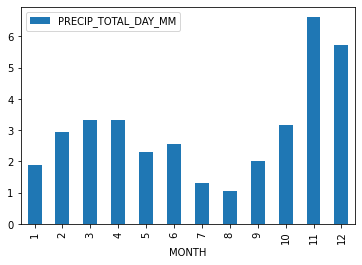

In [12]:
# Hop !

df_weather.pivot_table(
    values="PRECIP_TOTAL_DAY_MM",
    index="MONTH"
).plot(kind="bar")

## Pivot table with :
- Months on rows
- the average of Max Temperature on a first column of values
- the average of Sunhours on a second column of values

In [15]:
# Hop !

df_weather.pivot_table(
    index="MONTH",
    values=["MAX_TEMPERATURE_C", "SUNHOUR"],
    aggfunc={
        "MAX_TEMPERATURE_C": "mean",
        "SUNHOUR": "mean"}
)

,MAX_TEMPERATURE_C,SUNHOUR
MONTH,,
1,8.161290,5.709677
2,12.750000,8.346429
3,13.064516,9.077419
4,14.900000,9.533333
5,16.870968,11.809677
6,22.166667,14.170000
7,26.806452,14.141935
8,25.290323,11.135484
9,22.533333,9.683333


# Chart
Draw a chart from the previous pivot table with :
- Temperature in a blue column chart
- Sunhours in a red line plot

Tip : Once your pivot table created, you can help yourself with the `.reset_index()`  method.

,MONTH,MAX_TEMPERATURE_C,SUNHOUR
0,1,8.161290,5.709677
1,2,12.750000,8.346429
2,3,13.064516,9.077419
3,4,14.900000,9.533333
4,5,16.870968,11.809677
5,6,22.166667,14.170000
6,7,26.806452,14.141935
7,8,25.290323,11.135484
8,9,22.533333,9.683333
9,10,16.935484,7.151613


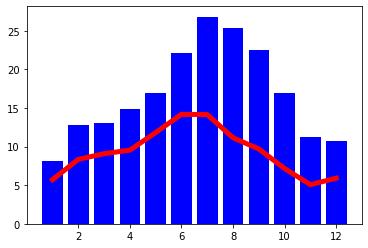

In [49]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(sharex=True)

df_plot = (df_weather.pivot_table(
            index="MONTH",
            values=["MAX_TEMPERATURE_C", "SUNHOUR"],
            aggfunc={
              "MAX_TEMPERATURE_C": "mean",
              "SUNHOUR": "mean"})
          .reset_index()
)

ax = plt.bar(
    data=df_plot,
    x="MONTH",
    height="MAX_TEMPERATURE_C",
    color="blue"
)

ax = plt.plot(
    "MONTH",
    "SUNHOUR",
    data=df_plot,
    color="red",
    lw=5
)

df_plot